In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('ECG_GSR_DATASET.csv')

In [3]:
df.head()

,ECG,HR,footGSR,handGSR,Lying down,Sleeping,With friends,Shopping,Running,Excersise,...,Surfing the Internet,Computer Work,Phone In Hand,In a meeting,Lab work,In class,Drinking(Alcohol),stress,Unnamed: 23,`
0,-0.001974,77.815789,2.417132,10.889447,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,NaN,NaN
1,0.002935,101.978261,2.417109,11.251065,1.0,1.0,NaN,0.0,1.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,NaN,NaN
2,0.006745,104.957447,2.226872,11.379638,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,NaN,NaN
3,-0.004043,87.702128,2.173021,11.470830,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0,0.0,0.0,NaN,0,NaN,NaN
4,0.012745,88.829787,2.017106,11.135255,1.0,0.0,1.0,1.0,NaN,0.0,...,NaN,0.0,0.0,0,0.0,0.0,0.0,0,NaN,NaN


In [4]:
df.columns.values.tolist()

['ECG',
 '      HR',
 'footGSR',
 'handGSR',
 'Lying  down',
 'Sleeping',
 'With friends',
 'Shopping',
 'Running',
 'Excersise',
 'At gym',
 'At party',
 'Bicycling',
 'At main workplace',
 'Watching TV',
 'Surfing the Internet',
 'Computer Work',
 'Phone In Hand',
 'In a meeting',
 'Lab work',
 'In class',
 'Drinking(Alcohol)',
 'stress',
 'Unnamed: 23',
 '`']

In [5]:
# Drop last two columns 
df.drop(df.columns[[-1,-2]],axis=1,inplace=True)

In [6]:
df.head()

,ECG,HR,footGSR,handGSR,Lying down,Sleeping,With friends,Shopping,Running,Excersise,...,At main workplace,Watching TV,Surfing the Internet,Computer Work,Phone In Hand,In a meeting,Lab work,In class,Drinking(Alcohol),stress
0,-0.001974,77.815789,2.417132,10.889447,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
1,0.002935,101.978261,2.417109,11.251065,1.0,1.0,NaN,0.0,1.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
2,0.006745,104.957447,2.226872,11.379638,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0
3,-0.004043,87.702128,2.173021,11.470830,0.0,0.0,1.0,1.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0,0.0,0.0,NaN,0
4,0.012745,88.829787,2.017106,11.135255,1.0,0.0,1.0,1.0,NaN,0.0,...,0,0.0,NaN,0.0,0.0,0,0.0,0.0,0.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ECG                   4128 non-null   float64
 1         HR              4128 non-null   float64
 2   footGSR               4128 non-null   float64
 3   handGSR               4057 non-null   float64
 4   Lying  down           4123 non-null   float64
 5   Sleeping              4124 non-null   float64
 6   With friends          4123 non-null   float64
 7   Shopping              4125 non-null   float64
 8   Running               4122 non-null   float64
 9   Excersise             4126 non-null   float64
 10  At gym                4123 non-null   float64
 11  At party              4127 non-null   float64
 12  Bicycling             4123 non-null   float64
 13  At main workplace     4128 non-null   int64  
 14  Watching TV           4123 non-null   float64
 15  Surfing the Internet 

In [8]:
df.describe()

,ECG,HR,footGSR,handGSR,Lying down,Sleeping,With friends,Shopping,Running,Excersise,...,Bicycling,At main workplace,Watching TV,Surfing the Internet,Computer Work,Phone In Hand,In a meeting,Lab work,In class,Drinking(Alcohol)
count,4128.000000,4128.000000,4128.000000,4057.000000,4123.000000,4124.000000,4123.000000,4125.000000,4122.000000,4126.000000,...,4123.000000,4128.000000,4123.000000,4123.00000,4124.000000,4123.000000,4128.000000,4123.000000,4123.000000,4123.000000
mean,0.170894,83.138526,6.488959,11.523533,0.328887,0.345296,0.316275,0.318061,0.328724,0.288657,...,0.200582,0.246609,0.309968,0.31773,0.313288,0.316760,0.265262,0.234780,0.203735,0.132670
std,0.137223,17.634848,4.307234,6.738931,0.469866,0.475522,0.465078,0.465780,0.469806,0.453193,...,0.400484,0.431089,0.462536,0.46565,0.463887,0.465269,0.441526,0.423913,0.402823,0.339259
min,-0.699585,11.800000,0.971111,-28.381533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.084477,72.860617,2.801966,6.714279,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.144157,79.926829,5.770180,9.653833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.207391,89.405263,8.839218,16.645400,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,0.681714,372.000000,22.582463,31.219800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.columns.values.tolist()

['ECG',
 '      HR',
 'footGSR',
 'handGSR',
 'Lying  down',
 'Sleeping',
 'With friends',
 'Shopping',
 'Running',
 'Excersise',
 'At gym',
 'At party',
 'Bicycling',
 'At main workplace',
 'Watching TV',
 'Surfing the Internet',
 'Computer Work',
 'Phone In Hand',
 'In a meeting',
 'Lab work',
 'In class',
 'Drinking(Alcohol)',
 'stress']

In [10]:
df.dtypes

ECG                     float64
      HR                float64
footGSR                 float64
handGSR                 float64
Lying  down             float64
Sleeping                float64
With friends            float64
Shopping                float64
Running                 float64
Excersise               float64
At gym                  float64
At party                float64
Bicycling               float64
At main workplace         int64
Watching TV             float64
Surfing the Internet    float64
Computer Work           float64
Phone In Hand           float64
In a meeting              int64
Lab work                float64
In class                float64
Drinking(Alcohol)       float64
stress                   object
dtype: object

In [11]:
df['stress']=pd.to_numeric(df['stress'],errors='coerce')

In [12]:
df.dtypes

ECG                     float64
      HR                float64
footGSR                 float64
handGSR                 float64
Lying  down             float64
Sleeping                float64
With friends            float64
Shopping                float64
Running                 float64
Excersise               float64
At gym                  float64
At party                float64
Bicycling               float64
At main workplace         int64
Watching TV             float64
Surfing the Internet    float64
Computer Work           float64
Phone In Hand           float64
In a meeting              int64
Lab work                float64
In class                float64
Drinking(Alcohol)       float64
stress                  float64
dtype: object

In [13]:
df.isnull().sum()

ECG                      0
      HR                 0
footGSR                  0
handGSR                 71
Lying  down              5
Sleeping                 4
With friends             5
Shopping                 3
Running                  6
Excersise                2
At gym                   5
At party                 1
Bicycling                5
At main workplace        0
Watching TV              5
Surfing the Internet     5
Computer Work            4
Phone In Hand            5
In a meeting             0
Lab work                 5
In class                 5
Drinking(Alcohol)        5
stress                   1
dtype: int64

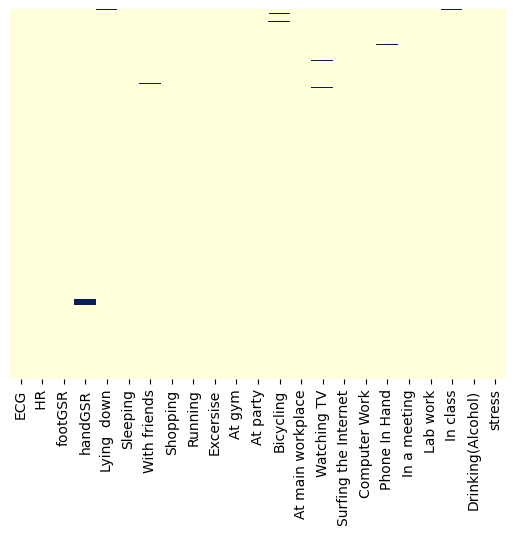

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [15]:
df['handGSR']=df['handGSR'].fillna(df['handGSR'].mean())

In [16]:
df=df.dropna()

In [17]:
df.isnull().sum()

ECG                     0
      HR                0
footGSR                 0
handGSR                 0
Lying  down             0
Sleeping                0
With friends            0
Shopping                0
Running                 0
Excersise               0
At gym                  0
At party                0
Bicycling               0
At main workplace       0
Watching TV             0
Surfing the Internet    0
Computer Work           0
Phone In Hand           0
In a meeting            0
Lab work                0
In class                0
Drinking(Alcohol)       0
stress                  0
dtype: int64

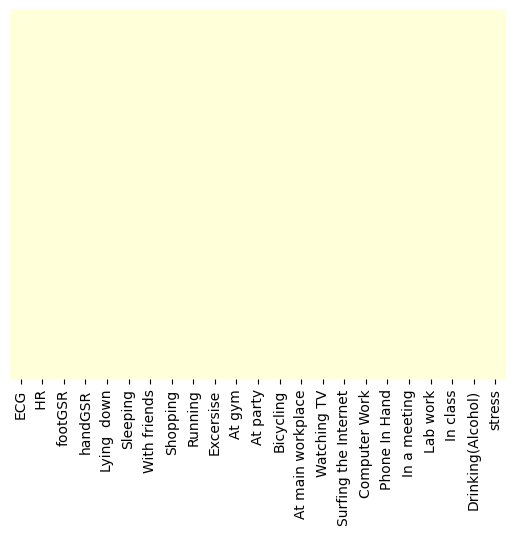

In [18]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [19]:
col=['Lying  down','Sleeping','With friends','Shopping','Running','Excersise','At gym','At party','Bicycling','At main workplace','Watching TV','Surfing the Internet','Computer Work','Phone In Hand','In a meeting','Lab work','In class','Drinking(Alcohol)']
for c in col:
    df[c]=df[c].astype(int)

In [20]:
df.dtypes

ECG                     float64
      HR                float64
footGSR                 float64
handGSR                 float64
Lying  down               int32
Sleeping                  int32
With friends              int32
Shopping                  int32
Running                   int32
Excersise                 int32
At gym                    int32
At party                  int32
Bicycling                 int32
At main workplace         int32
Watching TV               int32
Surfing the Internet      int32
Computer Work             int32
Phone In Hand             int32
In a meeting              int32
Lab work                  int32
In class                  int32
Drinking(Alcohol)         int32
stress                  float64
dtype: object

In [21]:
df.shape

(4062, 23)

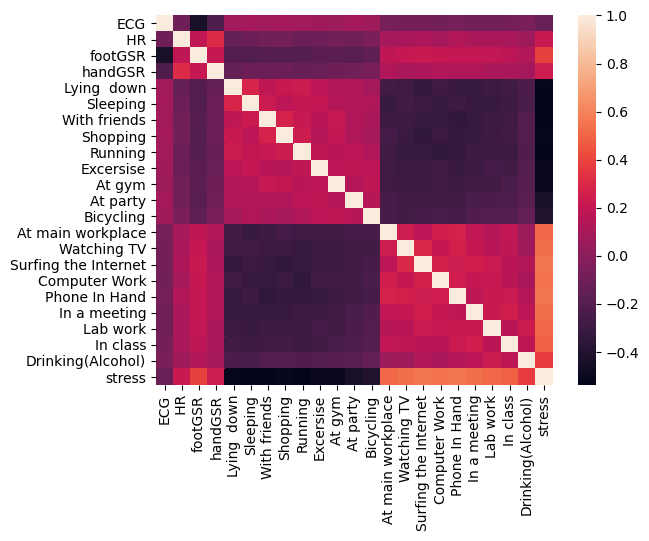

In [22]:
sns.heatmap(df.corr())

In [23]:
l=['Lying  down','Sleeping','With friends','Shopping','Running','Excersise','At gym','At party','Bicycling','At main workplace','Watching TV','Surfing the Internet','Computer Work','Phone In Hand','In a meeting','Lab work','In class','Drinking(Alcohol)']
for i in l:
    print(df[i].value_counts()) 
    print("\n")

0    2733
1    1329
Name: Lying  down, dtype: int64


0    2657
1    1405
Name: Sleeping, dtype: int64


0    2789
1    1273
Name: With friends, dtype: int64


0    2780
1    1282
Name: Shopping, dtype: int64


0    2734
1    1328
Name: Running, dtype: int64


0    2888
1    1174
Name: Excersise, dtype: int64


0    2916
1    1146
Name: At gym, dtype: int64


0    3079
1     983
Name: At party, dtype: int64


0    3250
1     812
Name: Bicycling, dtype: int64


0    3053
1    1009
Name: At main workplace, dtype: int64


0    2803
1    1259
Name: Watching TV, dtype: int64


0    2769
1    1293
Name: Surfing the Internet, dtype: int64


0    2784
1    1278
Name: Computer Work, dtype: int64


0    2768
1    1294
Name: Phone In Hand, dtype: int64


0    2981
1    1081
Name: In a meeting, dtype: int64


0    3109
1     953
Name: Lab work, dtype: int64


0    3234
1     828
Name: In class, dtype: int64


0    3519
1     543
Name: Drinking(Alcohol), dtype: int64




In [24]:
x=df.drop('stress',axis=1)
y=df['stress']

In [25]:
x.head()

,ECG,HR,footGSR,handGSR,Lying down,Sleeping,With friends,Shopping,Running,Excersise,...,Bicycling,At main workplace,Watching TV,Surfing the Internet,Computer Work,Phone In Hand,In a meeting,Lab work,In class,Drinking(Alcohol)
2,0.006745,104.957447,2.226872,11.379638,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0.027787,91.404255,2.147362,12.202340,0,1,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
8,-0.019386,88.022727,2.273705,13.609318,0,1,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
10,-0.000977,86.909091,1.956545,11.330386,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11,-0.003727,85.272727,1.861091,10.324932,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [27]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred= reg.predict(x_test)
y_pred=np.array(y_pred)

In [29]:
y_pred

array([ 0.87404385,  0.82303227,  0.06916434,  0.08036272,  0.06821482,
        1.07045259,  1.05847567,  0.05939628,  0.80716534,  0.09429789,
        0.09052485,  1.01319639,  0.41702326,  0.06313069,  0.09264378,
        0.85153884,  0.82866977,  0.86111616,  0.82296649,  0.02540631,
        0.888281  ,  0.04124271,  0.0178884 ,  0.81488101,  0.01775784,
        0.07015996,  0.83166533,  1.0871424 ,  0.80580976,  0.04322746,
        0.05924236,  1.09172417,  0.03824621,  1.04651902,  0.07453704,
        0.03368449,  1.00410046,  0.08255632,  0.06775946,  0.04247938,
        0.66306618,  0.07633037,  0.81950804,  0.07830786,  1.00358162,
        0.04759078,  1.0244454 ,  0.02194767,  1.0402058 ,  0.05550184,
        0.82854841,  0.08129431,  0.92178381,  0.83839163,  0.28127382,
        0.0773507 ,  0.64385423,  0.06874155,  1.01368751,  0.44993369,
        0.23877484,  0.64326975,  0.08745509,  0.2788196 ,  0.06673837,
        1.00172179,  0.07115852,  0.87510591,  1.02047026,  0.05

In [30]:
score=reg.score(x_test,y_test)
print(score*100)

92.98302615979385


In [31]:
y_test=np.array(y_test)

In [32]:
y_pred

array([ 0.87404385,  0.82303227,  0.06916434,  0.08036272,  0.06821482,
        1.07045259,  1.05847567,  0.05939628,  0.80716534,  0.09429789,
        0.09052485,  1.01319639,  0.41702326,  0.06313069,  0.09264378,
        0.85153884,  0.82866977,  0.86111616,  0.82296649,  0.02540631,
        0.888281  ,  0.04124271,  0.0178884 ,  0.81488101,  0.01775784,
        0.07015996,  0.83166533,  1.0871424 ,  0.80580976,  0.04322746,
        0.05924236,  1.09172417,  0.03824621,  1.04651902,  0.07453704,
        0.03368449,  1.00410046,  0.08255632,  0.06775946,  0.04247938,
        0.66306618,  0.07633037,  0.81950804,  0.07830786,  1.00358162,
        0.04759078,  1.0244454 ,  0.02194767,  1.0402058 ,  0.05550184,
        0.82854841,  0.08129431,  0.92178381,  0.83839163,  0.28127382,
        0.0773507 ,  0.64385423,  0.06874155,  1.01368751,  0.44993369,
        0.23877484,  0.64326975,  0.08745509,  0.2788196 ,  0.06673837,
        1.00172179,  0.07115852,  0.87510591,  1.02047026,  0.05

In [33]:
r2_score(y_test,y_pred)

0.9298302615979386

In [34]:
predicted = reg.predict([[0.059414634,84.51219512,5.620219512,8.783365854,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0]])
print(predicted)


[0.81550867]


# Neural Network

In [35]:

from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

Using TensorFlow backend.


In [36]:

import tensorflow.compat.v2 as tf
import keras
from keras.models import Sequential 
from keras.models import Sequential
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2944      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 167,809
Trainable params: 167,809
Non-trainable params: 0
_________________________________________________________________


In [37]:
NN_model.fit(x_train,y_train, epochs=500, batch_size=32, validation_split = 0.2)


Train on 2599 samples, validate on 650 samples
Epoch 1/500
2599/2599 [==============================] - 0s 167us/step - loss: 0.2556 - mean_absolute_error: 0.2556 - val_loss: 0.0953 - val_mean_absolute_error: 0.0953
Epoch 2/500
2599/2599 [==============================] - 0s 86us/step - loss: 0.0944 - mean_absolute_error: 0.0944 - val_loss: 0.0897 - val_mean_absolute_error: 0.0897
Epoch 3/500
2599/2599 [==============================] - 0s 96us/step - loss: 0.0771 - mean_absolute_error: 0.0771 - val_loss: 0.0755 - val_mean_absolute_error: 0.0755
Epoch 4/500
2599/2599 [==============================] - 0s 87us/step - loss: 0.0753 - mean_absolute_error: 0.0753 - val_loss: 0.1137 - val_mean_absolute_error: 0.1137
Epoch 5/500
2599/2599 [==============================] - 0s 109us/step - loss: 0.0752 - mean_absolute_error: 0.0752 - val_loss: 0.0968 - val_mean_absolute_error: 0.0968
Epoch 6/500
2599/2599 [==============================] - 0s 103us/step - loss: 0.0737 - mean_absolute_error: 0

In [38]:
y_pred1=NN_model.predict(x_test)

In [39]:
y_pred1

array([[ 8.94134402e-01],
       [ 8.66695881e-01],
       [ 1.47932231e-01],
       [-4.75056469e-04],
       [-1.01795048e-03],
       [ 9.98121440e-01],
       [ 9.98165250e-01],
       [ 1.27578378e-01],
       [ 8.60890448e-01],
       [ 1.01368718e-01],
       [-3.11411917e-04],
       [ 9.96767342e-01],
       [ 4.87490922e-01],
       [-9.75951552e-05],
       [-1.06945634e-03],
       [ 8.78550529e-01],
       [ 8.82070482e-01],
       [ 8.88231099e-01],
       [ 6.42294109e-01],
       [-7.18526542e-04],
       [ 9.13895249e-01],
       [-5.33454120e-04],
       [-7.73660839e-04],
       [ 8.78578961e-01],
       [-7.65606761e-04],
       [-1.02706254e-04],
       [ 7.95424819e-01],
       [ 9.98885214e-01],
       [ 8.72337997e-01],
       [-9.82172787e-04],
       [ 1.28225386e-01],
       [ 9.97962713e-01],
       [ 1.06532387e-01],
       [ 9.97416258e-01],
       [ 1.04463674e-01],
       [-5.56215644e-04],
       [ 9.98713493e-01],
       [-9.39823687e-04],
       [ 6.2

In [40]:
y_pred1=y_pred1.flatten()
y_pred1

array([ 8.94134402e-01,  8.66695881e-01,  1.47932231e-01, -4.75056469e-04,
       -1.01795048e-03,  9.98121440e-01,  9.98165250e-01,  1.27578378e-01,
        8.60890448e-01,  1.01368718e-01, -3.11411917e-04,  9.96767342e-01,
        4.87490922e-01, -9.75951552e-05, -1.06945634e-03,  8.78550529e-01,
        8.82070482e-01,  8.88231099e-01,  6.42294109e-01, -7.18526542e-04,
        9.13895249e-01, -5.33454120e-04, -7.73660839e-04,  8.78578961e-01,
       -7.65606761e-04, -1.02706254e-04,  7.95424819e-01,  9.98885214e-01,
        8.72337997e-01, -9.82172787e-04,  1.28225386e-01,  9.97962713e-01,
        1.06532387e-01,  9.97416258e-01,  1.04463674e-01, -5.56215644e-04,
        9.98713493e-01, -9.39823687e-04,  6.25763386e-02,  1.10140905e-01,
        9.90224540e-01, -2.55592167e-04,  8.70587289e-01, -5.72264194e-04,
        9.97025967e-01,  5.70863485e-05,  9.98455644e-01, -7.32205808e-04,
        9.86336052e-01,  1.15785383e-01,  8.72117519e-01,  1.29214197e-01,
        9.96846378e-01,  

In [41]:
r2_score(y_test, y_pred1)

0.9401610348100683

# RandomForest Regressor

In [42]:
model1= RandomForestRegressor()
model1.fit(x_train,y_train)


RandomForestRegressor()

In [43]:
y_pred2=model1.predict(x_test)
y_pred2

array([8.81658363e-01, 7.95168007e-01, 1.23739568e-01, 5.09029918e-02,
       1.31578947e-03, 1.00000000e+00, 1.00000000e+00, 1.21588587e-01,
       8.52309260e-01, 1.04162107e-01, 1.17342497e-01, 1.00000000e+00,
       3.85342396e-01, 1.83911198e-02, 2.48961977e-02, 8.57644171e-01,
       9.03038546e-01, 9.09143942e-01, 3.50645399e-01, 2.12195122e-02,
       8.90243031e-01, 1.06382979e-03, 0.00000000e+00, 9.13572446e-01,
       0.00000000e+00, 1.96367522e-02, 8.37671275e-01, 1.00000000e+00,
       8.82840289e-01, 9.66486728e-02, 1.02534489e-01, 9.10996295e-01,
       1.38586433e-01, 1.00000000e+00, 4.71050826e-02, 3.35948178e-02,
       1.00000000e+00, 2.27097782e-02, 1.06208952e-01, 8.98816283e-02,
       7.41484681e-01, 8.18912419e-02, 8.68187222e-01, 5.53689881e-02,
       9.96097561e-01, 4.17749772e-02, 9.96780488e-01, 0.00000000e+00,
       1.00000000e+00, 3.05193787e-02, 8.77144185e-01, 1.22650583e-01,
       6.88600581e-01, 8.82990484e-01, 1.65794871e-01, 6.74820197e-02,
      

In [44]:
r2_score(y_test, y_pred2)

0.9393775502672351

# XGBoost

In [45]:
XGBModel = XGBRegressor()
XGBModel.fit(x_train,y_train , verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [46]:
y_pred3=XGBModel.predict(x_test)
y_pred3

array([ 8.70849431e-01,  8.22013617e-01,  1.01719446e-01, -2.60428283e-02,
       -3.35730016e-02,  1.01164865e+00,  9.91208792e-01,  6.75872639e-02,
        8.89199555e-01,  4.85183969e-02,  8.88111070e-02,  1.00533366e+00,
        4.10830259e-01,  1.65826129e-03,  7.21747801e-02,  8.69585812e-01,
        9.15976048e-01,  8.77578199e-01,  4.19244856e-01,  8.56151506e-02,
        9.22924459e-01,  7.34888902e-03,  1.22360289e-02,  8.46710742e-01,
        9.39088687e-03,  2.93492321e-02,  8.69679451e-01,  1.00834048e+00,
        9.00036812e-01,  9.03510526e-02,  9.17106941e-02,  9.78670597e-01,
        1.04616739e-01,  9.98127460e-01,  3.63188796e-02, -2.00614799e-04,
        1.01300585e+00,  1.14085980e-01,  1.15602642e-01,  1.14482798e-01,
        8.12936127e-01,  4.73328233e-02,  8.53229523e-01,  1.05121367e-01,
        1.16591370e+00,  6.80425167e-02,  1.01359558e+00,  2.47719232e-03,
        9.93273735e-01,  8.58665258e-02,  8.82258058e-01,  1.71993226e-01,
        6.44921839e-01,  

In [47]:
r2_score(y_test, y_pred3)

0.9407007261702205

In [48]:
print(y)

2       0.000000
5       0.000000
8       0.000000
10      0.000000
11      0.000000
          ...   
4123    0.131579
4124    0.131579
4125    0.138889
4126    0.135135
4127    0.128205
Name: stress, Length: 4062, dtype: float64


## Saving Best Accuracy Scored Model

In [49]:
# saving and loading the .h5 model
 
# save model
from keras.models import load_model
NN_model.save('RegressionModel.h5')

print('Model Saved!')
 
# load model

savedModel=load_model('RegressionModel.h5')
savedModel.summary()

Model Saved!
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2944      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 167,809
Trainable params: 167,809
Non-trainable params: 0
_________________________________________________________________


In [50]:
y_pred4=savedModel.predict(x_test)

In [51]:
y_pred4=y_pred4.flatten()
y_pred4

array([ 8.94134402e-01,  8.66695881e-01,  1.47932231e-01, -4.75056469e-04,
       -1.01795048e-03,  9.98121440e-01,  9.98165250e-01,  1.27578378e-01,
        8.60890448e-01,  1.01368718e-01, -3.11411917e-04,  9.96767342e-01,
        4.87490922e-01, -9.75951552e-05, -1.06945634e-03,  8.78550529e-01,
        8.82070482e-01,  8.88231099e-01,  6.42294109e-01, -7.18526542e-04,
        9.13895249e-01, -5.33454120e-04, -7.73660839e-04,  8.78578961e-01,
       -7.65606761e-04, -1.02706254e-04,  7.95424819e-01,  9.98885214e-01,
        8.72337997e-01, -9.82172787e-04,  1.28225386e-01,  9.97962713e-01,
        1.06532387e-01,  9.97416258e-01,  1.04463674e-01, -5.56215644e-04,
        9.98713493e-01, -9.39823687e-04,  6.25763386e-02,  1.10140905e-01,
        9.90224540e-01, -2.55592167e-04,  8.70587289e-01, -5.72264194e-04,
        9.97025967e-01,  5.70863485e-05,  9.98455644e-01, -7.32205808e-04,
        9.86336052e-01,  1.15785383e-01,  8.72117519e-01,  1.29214197e-01,
        9.96846378e-01,  

In [52]:
r2_score(y_test, y_pred4)

0.9401610348100683

In [53]:

Xnew = np.array([[0.141853659,79.82926829,9.272121951,8.319121951,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0]])

ynew = savedModel.predict(Xnew)

print("X=%s\n Predicted Output=%s" % (Xnew[0], ynew[0]))

X=[ 0.14185366 79.82926829  9.27212195  8.31912195  0.          0.
  1.          1.          1.          1.          1.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
 Predicted Output=[0.12450486]


In [54]:

Xnew = np.array([[0.13395122,80.56097561,11.80765854,9.233170732,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0]])

ynew = savedModel.predict(Xnew)

print("X=%s\n Predicted Output=%s" % (Xnew[0], ynew[0]))

X=[ 0.13395122 80.56097561 11.80765854  9.23317073  1.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          1.          1.
  0.          1.          0.          0.        ]
 Predicted Output=[0.87519467]


# CLASSIFICATION

In [55]:
d=df

In [56]:
d.head()

,ECG,HR,footGSR,handGSR,Lying down,Sleeping,With friends,Shopping,Running,Excersise,...,At main workplace,Watching TV,Surfing the Internet,Computer Work,Phone In Hand,In a meeting,Lab work,In class,Drinking(Alcohol),stress
2,0.006745,104.957447,2.226872,11.379638,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
5,0.027787,91.404255,2.147362,12.202340,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0.0
8,-0.019386,88.022727,2.273705,13.609318,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0.0
10,-0.000977,86.909091,1.956545,11.330386,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0.0
11,-0.003727,85.272727,1.861091,10.324932,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0


In [57]:
new_stress=pd.cut(d.stress,bins=2,labels=['0','1'])
d.insert(22,'Stress',new_stress)

In [58]:
new_stress

2       0
5       0
8       0
10      0
11      0
       ..
4123    0
4124    0
4125    0
4126    0
4127    0
Name: stress, Length: 4062, dtype: category
Categories (2, object): [0 < 1]

In [59]:
d.head()

,ECG,HR,footGSR,handGSR,Lying down,Sleeping,With friends,Shopping,Running,Excersise,...,Watching TV,Surfing the Internet,Computer Work,Phone In Hand,In a meeting,Lab work,In class,Drinking(Alcohol),Stress,stress
2,0.006745,104.957447,2.226872,11.379638,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
5,0.027787,91.404255,2.147362,12.202340,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0.0
8,-0.019386,88.022727,2.273705,13.609318,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0.0
10,-0.000977,86.909091,1.956545,11.330386,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0.0
11,-0.003727,85.272727,1.861091,10.324932,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0


In [60]:
d.drop(d.columns[[-1]],axis=1,inplace=True)

In [61]:
d.head()

,ECG,HR,footGSR,handGSR,Lying down,Sleeping,With friends,Shopping,Running,Excersise,...,At main workplace,Watching TV,Surfing the Internet,Computer Work,Phone In Hand,In a meeting,Lab work,In class,Drinking(Alcohol),Stress
2,0.006745,104.957447,2.226872,11.379638,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0.027787,91.404255,2.147362,12.202340,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,-0.019386,88.022727,2.273705,13.609318,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
10,-0.000977,86.909091,1.956545,11.330386,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
11,-0.003727,85.272727,1.861091,10.324932,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
d.columns

Index(['ECG', '      HR', 'footGSR', 'handGSR', 'Lying  down', 'Sleeping',
       'With friends', 'Shopping', 'Running', 'Excersise', 'At gym',
       'At party', 'Bicycling', 'At main workplace', 'Watching TV',
       'Surfing the Internet', 'Computer Work', 'Phone In Hand',
       'In a meeting', 'Lab work', 'In class', 'Drinking(Alcohol)', 'Stress'],
      dtype='object')

In [63]:
d.isnull().sum()

ECG                     0
      HR                0
footGSR                 0
handGSR                 0
Lying  down             0
Sleeping                0
With friends            0
Shopping                0
Running                 0
Excersise               0
At gym                  0
At party                0
Bicycling               0
At main workplace       0
Watching TV             0
Surfing the Internet    0
Computer Work           0
Phone In Hand           0
In a meeting            0
Lab work                0
In class                0
Drinking(Alcohol)       0
Stress                  0
dtype: int64

In [64]:
x1=d.drop('Stress',axis=1)
y1=d['Stress']

In [65]:
x1.shape

(4062, 22)

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=5)

# KNN 

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.940959409594096

Text(0.5, 1.0, 'Confusion Matrix')

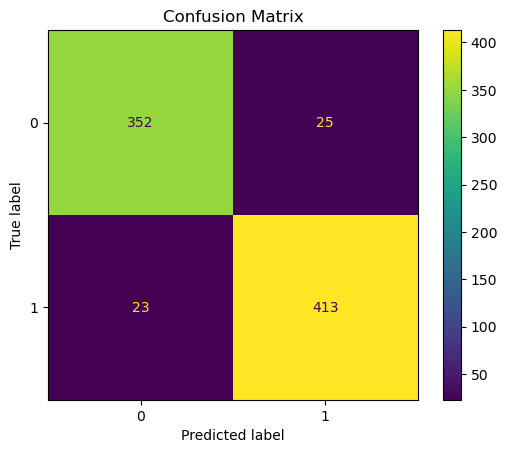

In [68]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knnclassifier,x_test,y_test)
plt.title('Confusion Matrix')

In [69]:
from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors=4)
print(cross_val_score(knnclassifier, x_train, y_train, cv=10, scoring ='accuracy').mean())

0.9270531813865148


In [70]:
print(cross_val_score(knnclassifier, x_test, y_test, cv=10, scoring ='accuracy').mean())

0.835230352303523


# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [72]:
y_pred = classifier.predict(x_test)
y_pred

array(['1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0',
       '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0',
       '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0',
       '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0',
       '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0',
       '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '1',
       '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1',
       '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1',
       '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1',
       '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0',
       '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1',
       '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0

In [73]:
# Accuacy
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[367  10]
 [ 12 424]]
0.972939729397294


In [74]:
print("Accuracy :" , classifier.score(x_test,y_test))

Accuracy : 0.972939729397294


In [75]:
classifier.predict(np.array([[-0.0016,97.88888889,3.028511111,20.05544444,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0]]))[0]

'1'

Text(0.5, 1.0, 'Confusion Matrix')

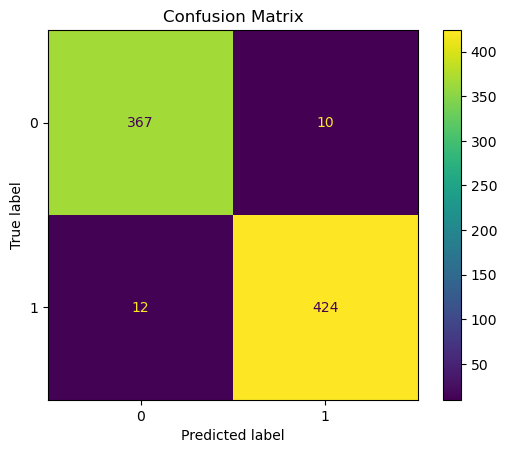

In [76]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test)
plt.title('Confusion Matrix')

# Naive Bayes


In [77]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [78]:
y_pred=model.predict(x_test)
y_pred

array(['1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1',
       '0', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0',
       '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0',
       '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0',
       '0', '1', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0',
       '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0',
       '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1',
       '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1',
       '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0', '0', '1',
       '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1',
       '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1',
       '0', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0',
       '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1',
       '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0

In [79]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy: ",accuracy)

Accuracy:  95.6949569495695


In [80]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[353,  24],
       [ 11, 425]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

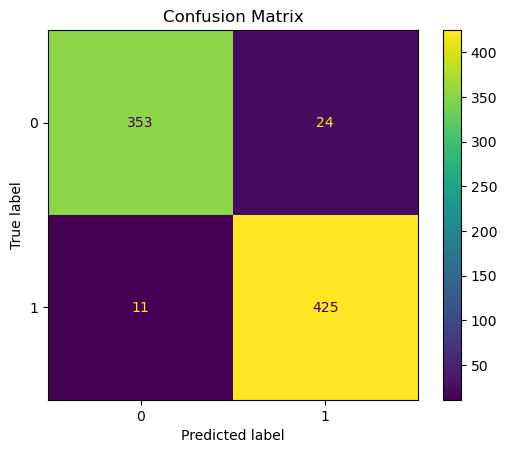

In [81]:
plot_confusion_matrix(model,x_test,y_test)
plt.title('Confusion Matrix')

# SVM

In [82]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma=0.7)
classifier.fit(x_train, y_train)

SVC(gamma=0.7)

In [83]:
y_pred = classifier.predict(x_test)

In [84]:
accuracy=accuracy_score(y_test,y_pred)*100 
print("Accuracy: ",accuracy)

Accuracy:  81.18081180811808


In [85]:
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [86]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [87]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy: ",accuracy)

Accuracy:  97.17097170971711


In [88]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[367,  10],
       [ 13, 423]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

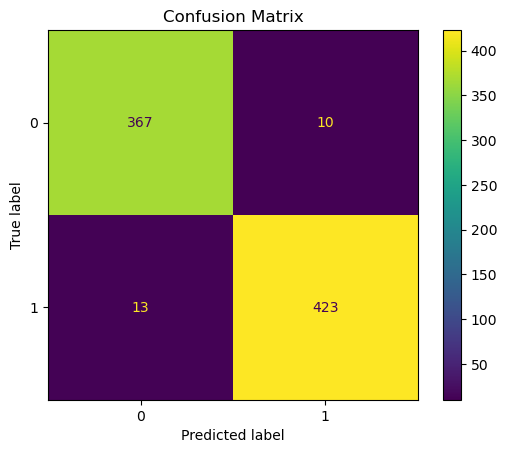

In [89]:
plot_confusion_matrix(classifier,x_test,y_test)
plt.title('Confusion Matrix')

# DECISION TREE CLASSIFIER

In [90]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.948339483394834


[[360  17]
 [ 25 411]]


Text(0.5, 1.0, 'Confusion Matrix')

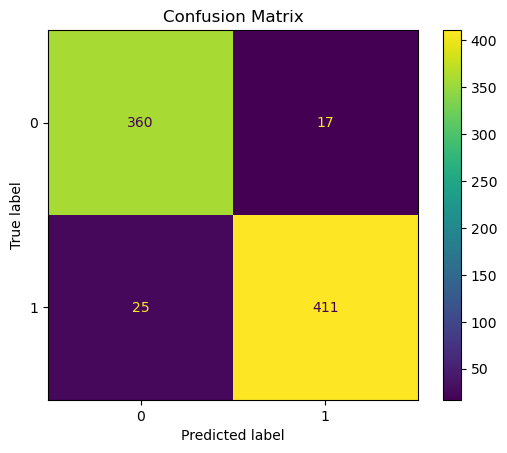

In [91]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

plot_confusion_matrix(clf,x_test,y_test)
plt.title('Confusion Matrix')

# ANN MODEL

In [92]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [93]:
import tensorflow.compat.v2 as tf
import keras

cl = Sequential()

cl.add(Dense(units=10, input_dim=x1.shape[1], kernel_initializer='uniform', activation='relu'))
 

cl.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
 

cl.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
 

cl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 

survivalANN_Model=cl.fit(x_train,y_train, batch_size=10 , epochs=10, verbose=1, validation_split=0.2)
 
    

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2599 samples, validate on 650 samples
Epoch 1/10
2599/2599 [==============================] - 1s 235us/step - loss: 0.5761 - accuracy: 0.7064 - val_loss: 0.2558 - val_accuracy: 0.9662
Epoch 2/10
2599/2599 [==============================] - 0s 161us/step - loss: 0.1349 - accuracy: 0.9692 - val_loss: 0.0793 - val_accuracy: 0.9738
Epoch 3/10
2599/2599 [==============================] - 0s 161us/step - loss: 0.0804 - accuracy: 0.9711 - val_loss: 0.0709 - val_accuracy: 0.9708
Epoch 4/10
2599/2599 [==============================] - 0s 139us/step - loss: 0.0762 - accuracy: 0.9723 - val_loss: 0.0627 - val_accuracy: 0.9692
Epoch 5/10
2599/2599 [==============================] - 0s 135us/step - loss: 0.0723 - accuracy: 0.9727 - val_loss: 0.0600 - val_accuracy: 0.9723
Epoch 6/10
2599/2599 [==============================] - 0s 148us/step - loss: 0.0749 - accuracy: 0.9708 - val_loss: 0.0682 - val_

In [94]:

# Defining a function for finding best hyperparameters
def FunctionFindBestParams(x_train, y_train):
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list=[5, 10, 50 ,100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            
            cl = Sequential()
            cl.add(Dense(units=10, input_dim=x1.shape[1], kernel_initializer='uniform', activation='relu'))
            cl.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
            cl.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            cl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
            
            survivalANN_Model=cl.fit(x_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            
            Accuracy = survivalANN_Model.history['accuracy'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
# Calling the function
ResultsData=FunctionFindBestParams(x_train, y_train)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 0.971068
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 0.9707602
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 0.9738381
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 0.97722375
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 0.9704524
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 0.97291476
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 0.97291476
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 0.9738381
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 0.9701447
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 0.9701447
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 0.9713758
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 0.9741459
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 0.9716836
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 0.9704524
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 0.9738381
16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 0.9735303


  TrialNumber            Parameters  Accuracy
0           4  batch_size5-epoch100  0.977224


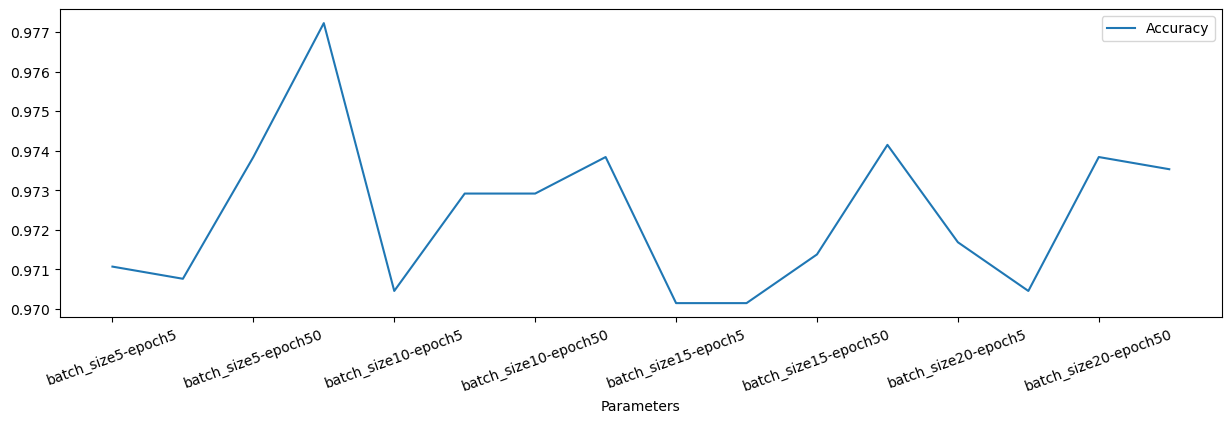

In [95]:

# Printing the best parameter
print(ResultsData.sort_values(by='Accuracy', ascending=False).head(1))
 

# Visualizing the results
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)


In [96]:

history=cl.fit(x_train,y_train, batch_size=5 , epochs=100, verbose=1,validation_split=0.2)


Train on 2599 samples, validate on 650 samples
Epoch 1/100
2599/2599 [==============================] - 1s 420us/step - loss: 0.0749 - accuracy: 0.9711 - val_loss: 0.0629 - val_accuracy: 0.9754
Epoch 2/100
2599/2599 [==============================] - 1s 300us/step - loss: 0.0724 - accuracy: 0.9692 - val_loss: 0.0596 - val_accuracy: 0.9738
Epoch 3/100
2599/2599 [==============================] - 1s 383us/step - loss: 0.0725 - accuracy: 0.9723 - val_loss: 0.0702 - val_accuracy: 0.9708
Epoch 4/100
2599/2599 [==============================] - 1s 390us/step - loss: 0.0744 - accuracy: 0.9754 - val_loss: 0.0598 - val_accuracy: 0.9723
Epoch 5/100
2599/2599 [==============================] - 1s 487us/step - loss: 0.0723 - accuracy: 0.9711 - val_loss: 0.0602 - val_accuracy: 0.9723
Epoch 6/100
2599/2599 [==============================] - 1s 438us/step - loss: 0.0734 - accuracy: 0.9723 - val_loss: 0.0706 - val_accuracy: 0.9708
Epoch 7/100
2599/2599 [==============================] - 1s 430us/step 

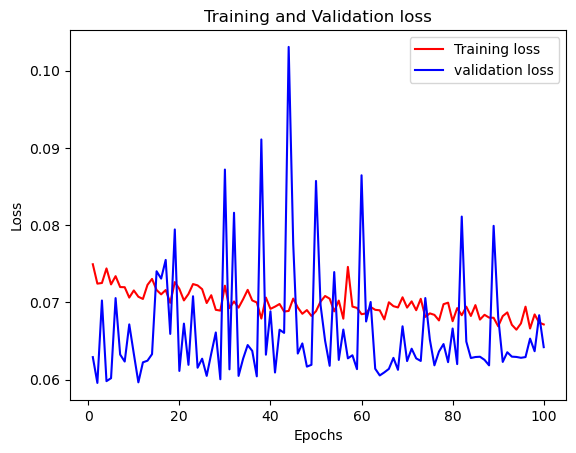

In [97]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

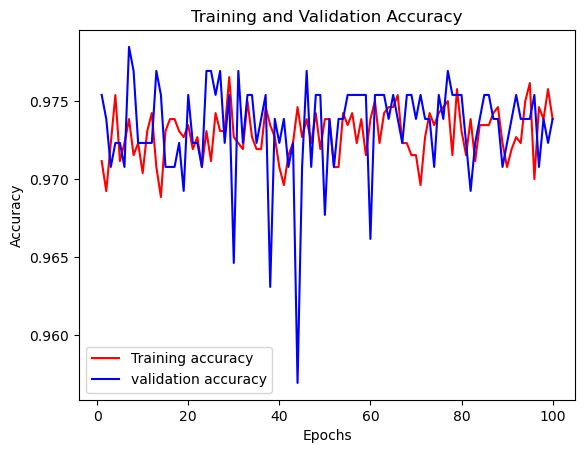

In [98]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, accuracy_train, 'r', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

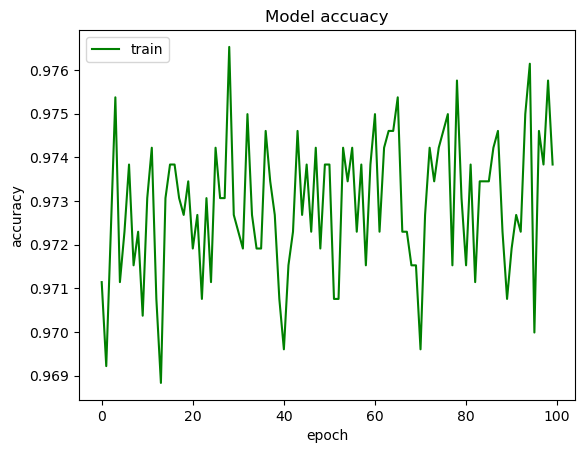

In [99]:
plt.plot(history.history['accuracy'],'g')
plt.title('Model accuacy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

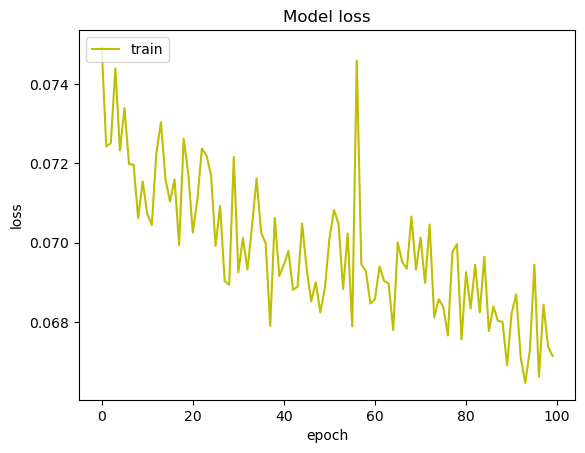

In [100]:
plt.plot(history.history['loss'],'y')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [101]:

Xnew = np.array([[0.141853659,79.82926829,9.272121951,8.319121951,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0]])

ynew = cl.predict_classes(Xnew)

print("X=%s\n Predicted Output=%s" % (Xnew[0], ynew[0]))

X=[ 0.14185366 79.82926829  9.27212195  8.31912195  0.          0.
  1.          1.          1.          1.          1.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
 Predicted Output=[0]


In [102]:

Xnew = np.array([[0.13395122,80.56097561,11.80765854,9.233170732,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0]])

ynew = cl.predict_classes(Xnew)

print("X=%s\n Predicted Output=%s" % (Xnew[0], ynew[0]))

X=[ 0.13395122 80.56097561 11.80765854  9.23317073  1.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          1.          1.
  0.          1.          0.          0.        ]
 Predicted Output=[1]


Feature: 0, Score: 0.88908
Feature: 1, Score: 0.01760
Feature: 2, Score: 0.18048
Feature: 3, Score: 0.07024
Feature: 4, Score: -1.58886
Feature: 5, Score: -1.76553
Feature: 6, Score: -1.50007
Feature: 7, Score: -1.63729
Feature: 8, Score: -1.84281
Feature: 9, Score: -1.83348
Feature: 10, Score: -1.60767
Feature: 11, Score: -1.47735
Feature: 12, Score: -1.74301
Feature: 13, Score: 1.13495
Feature: 14, Score: 1.02054
Feature: 15, Score: 0.93792
Feature: 16, Score: 1.17946
Feature: 17, Score: 1.01773
Feature: 18, Score: 1.11506
Feature: 19, Score: 1.37785
Feature: 20, Score: 1.09048
Feature: 21, Score: 1.01622


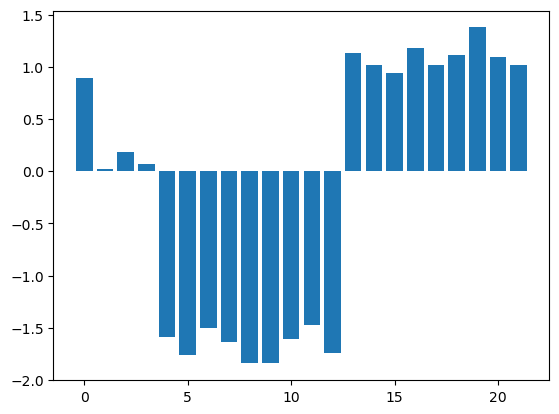

In [103]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
# define the model
model1 = LogisticRegression()
# fit the model
model1.fit(x1, y1)
# get importance
importance = model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.14533
Feature: 1, Score: 0.00054
Feature: 2, Score: 0.00529
Feature: 3, Score: 0.00199
Feature: 4, Score: -0.16033
Feature: 5, Score: -0.16644
Feature: 6, Score: -0.16477
Feature: 7, Score: -0.15373
Feature: 8, Score: -0.16069
Feature: 9, Score: -0.16030
Feature: 10, Score: -0.16479
Feature: 11, Score: -0.15869
Feature: 12, Score: -0.15695
Feature: 13, Score: 0.02925
Feature: 14, Score: 0.02813
Feature: 15, Score: 0.03120
Feature: 16, Score: 0.03736
Feature: 17, Score: 0.02807
Feature: 18, Score: 0.03277
Feature: 19, Score: 0.03404
Feature: 20, Score: 0.03218
Feature: 21, Score: 0.02775


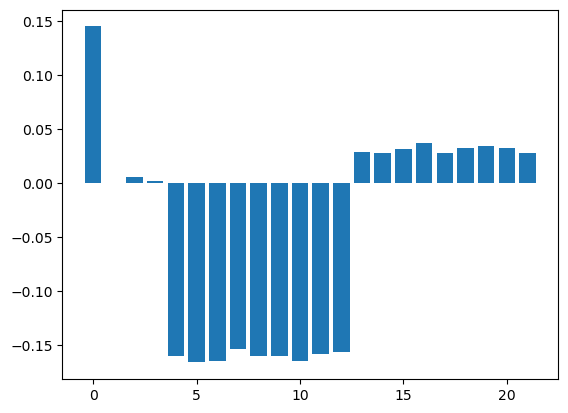

In [104]:

# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# define the model
model2 = LinearRegression()
# fit the model
model2.fit(x, y)
# get importance
importance = model2.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.01152
Feature: 1, Score: 0.01390
Feature: 2, Score: 0.02335
Feature: 3, Score: 0.02324
Feature: 4, Score: 0.01171
Feature: 5, Score: 0.03073
Feature: 6, Score: 0.01544
Feature: 7, Score: 0.01034
Feature: 8, Score: 0.01548
Feature: 9, Score: 0.00807
Feature: 10, Score: 0.01027
Feature: 11, Score: 0.00763
Feature: 12, Score: 0.00510
Feature: 13, Score: 0.01542
Feature: 14, Score: 0.01107
Feature: 15, Score: 0.24519
Feature: 16, Score: 0.04859
Feature: 17, Score: 0.28704
Feature: 18, Score: 0.16499
Feature: 19, Score: 0.03066
Feature: 20, Score: 0.00698
Feature: 21, Score: 0.00329


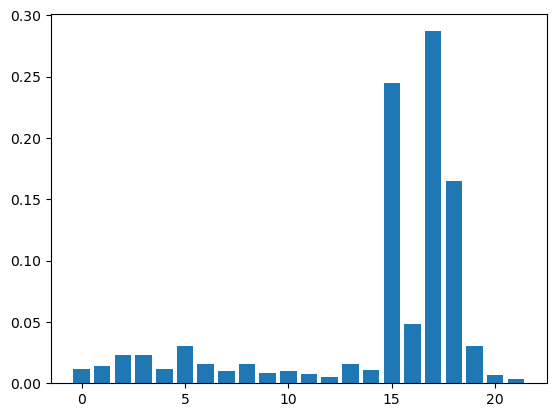

In [105]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define the model
model3 = RandomForestRegressor()
# fit the model
model3.fit(x, y)
# get importance
importance = model3.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [106]:
# saving and loading the .h5 model
 
# save model
from keras.models import load_model
cl.save('ClassificationModel.h5')

print('Model Saved!')
 
# load model

saveModel=load_model('ClassificationModel.h5')
saveModel.summary()

Model Saved!
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                230       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 7         
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [108]:
Xnew = np.array([[0.141853659,79.82926829,9.272121951,8.319121951,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0]])

ynew = saveModel.predict_classes(Xnew)

print("X=%s\n Predicted Output=%s" % (Xnew[0], ynew[0]))

X=[ 0.14185366 79.82926829  9.27212195  8.31912195  0.          0.
  1.          1.          1.          1.          1.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
 Predicted Output=[0]


In [109]:

Xnew = np.array([[0.13395122,80.56097561,11.80765854,9.233170732,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0]])

ynew = saveModel.predict_classes(Xnew)

print("X=%s\n Predicted Output=%s" % (Xnew[0], ynew[0]))

X=[ 0.13395122 80.56097561 11.80765854  9.23317073  1.          0.
  0.          0.          0.          0.          0.          0.
  0.          1.          0.          0.          1.          1.
  0.          1.          0.          0.        ]
 Predicted Output=[1]
